In [2]:
# AFM Cantilever simulation
import ffta
import matplotlib.pyplot as plt
import numpy as np
from ffta.simulation.mechanical_drive import MechanicalDrive
from ffta.simulation.utils.load import simulation_configuration
from ffta.simulation.utils import excitation

In [3]:
import wget
path = 'params.cfg'
wget.download('https://raw.githubusercontent.com/rajgiriUW/ffta/master/ffta/simulation/example_params/example_sim_params_roundnumbers.cfg', path, bar=None)

'params.cfg'

In [6]:
cantil_params, force_params, simul_params = simulation_configuration(path)

In [18]:
for key in {**cantil_params,**force_params,**simul_params}.keys():
    print(key)

amp_invols
def_invols
soft_amp
drive_freq
res_freq
k
q_factor
es_force
delta_freq
tau
trigger
total_time
sampling_rate


In [20]:
cantil = MechanicalDrive(cantil_params,force_params,simul_params)

In [24]:
for key,value in cantil.__dict__.items():
    print(key,value)

amp_invols 5e-08
def_invols 5e-08
soft_amp 1.0
drive_freq 300000.0
res_freq 300000.0
k 20.0
q_factor 450.0
es_force 3e-09
delta_freq -200.0
tau 1e-05
trigger 0.0002
total_time 0.005
sampling_rate 10000000.0
w0 1884955.5921538759
wd 1884955.5921538759
delta_w -1256.6370614359173
beta 2094.3951023931954
mass 5.628954646796543e-12
amp 5e-08
f0 394.7841760435743
delta 1.5707963267948966
fe 532.9586376588254
t_Z [0.00000e+00 1.00002e-07 2.00004e-07 ... 4.99980e-03 4.99990e-03
 5.00000e-03]
freq_Z [0.0000e+00 2.0000e+02 4.0000e+02 ... 4.9996e+06 4.9998e+06 5.0000e+06]
fit_params {}
parameters {'es_force': 3e-09, 'delta_freq': -200.0, 'tau': 1e-05, 'trigger': 0.0002, 'total_time': 0.005, 'sampling_rate': 10000000.0}
can_params {'amp_invols': 5e-08, 'def_invols': 5e-08, 'soft_amp': 1.0, 'drive_freq': 300000.0, 'res_freq': 300000.0, 'k': 20.0, 'q_factor': 450.0}
use_varray False
func <function single_exp at 0x000002446F42B3A0>
func_args [1e-05]


In [26]:
Z,info = cantil.simulate()
print(Z)
print(info)

[-5.33306184e-14 -9.36881130e-09 -1.84056694e-08 ...  3.81398055e-08
  3.38549063e-08  2.83653864e-08]
{'hu': array([3.11289584e-08, 1.79449697e-08, 2.34133637e-08, ...,
       5.23962279e-08, 5.23962279e-08, 5.23962279e-08]), 'tcur': array([1.01184502e-07, 2.17119129e-07, 3.10772584e-07, ...,
       5.00631907e-03, 5.00642386e-03, 5.00652865e-03]), 'tolsf': array([1.83014281e-76, 1.83014281e-76, 1.83014281e-76, ...,
       1.83014281e-76, 1.83014281e-76, 1.83014281e-76]), 'tsw': array([2.8559988e-10, 2.8559988e-10, 2.8559988e-10, ..., 2.8559988e-10,
       2.8559988e-10, 2.8559988e-10]), 'nst': array([   41,    47,    51, ..., 98150, 98152, 98154], dtype=int32), 'nfe': array([    77,     94,     99, ..., 172339, 172343, 172347], dtype=int32), 'nje': array([   5,    6,    6, ..., 5941, 5941, 5941], dtype=int32), 'nqu': array([3, 3, 4, ..., 5, 5, 5], dtype=int32), 'imxer': -1, 'lenrw': 52, 'leniw': 22, 'mused': array([2, 2, 2, ..., 2, 2, 2], dtype=int32), 'message': 'Integration success

Text(0.5, 1.0, 'Time constant : 1e-05s')

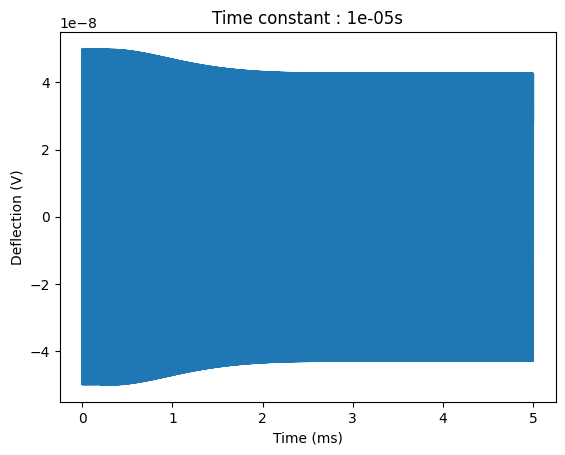

In [ ]:
# cantil.t_Z -> sampling_rate 10000000.0Hz, total_time 0.005s
plt.plot(cantil.t_Z * 1e3, Z)
plt.xlabel('Time (ms)')
plt.ylabel('Deflection (V)')
plt.title(f'Time constant : {cantil.tau}s')

Text(0, 0.5, 'Deflection (V)')

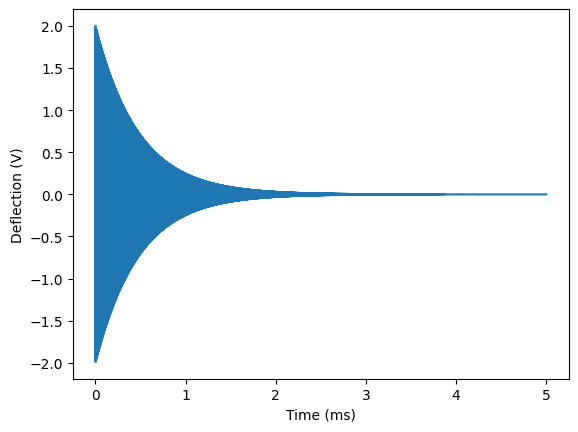

In [53]:
# 초기조건을 Z0으로 설정 / 처음 위치, 속도 [z0,v0]
Z, info = cantil.simulate(Z0 = np.array([2,2]))
plt.plot(cantil.t_Z * 1e3, Z)
plt.xlabel('Time (ms)')
plt.ylabel('Deflection (V)')

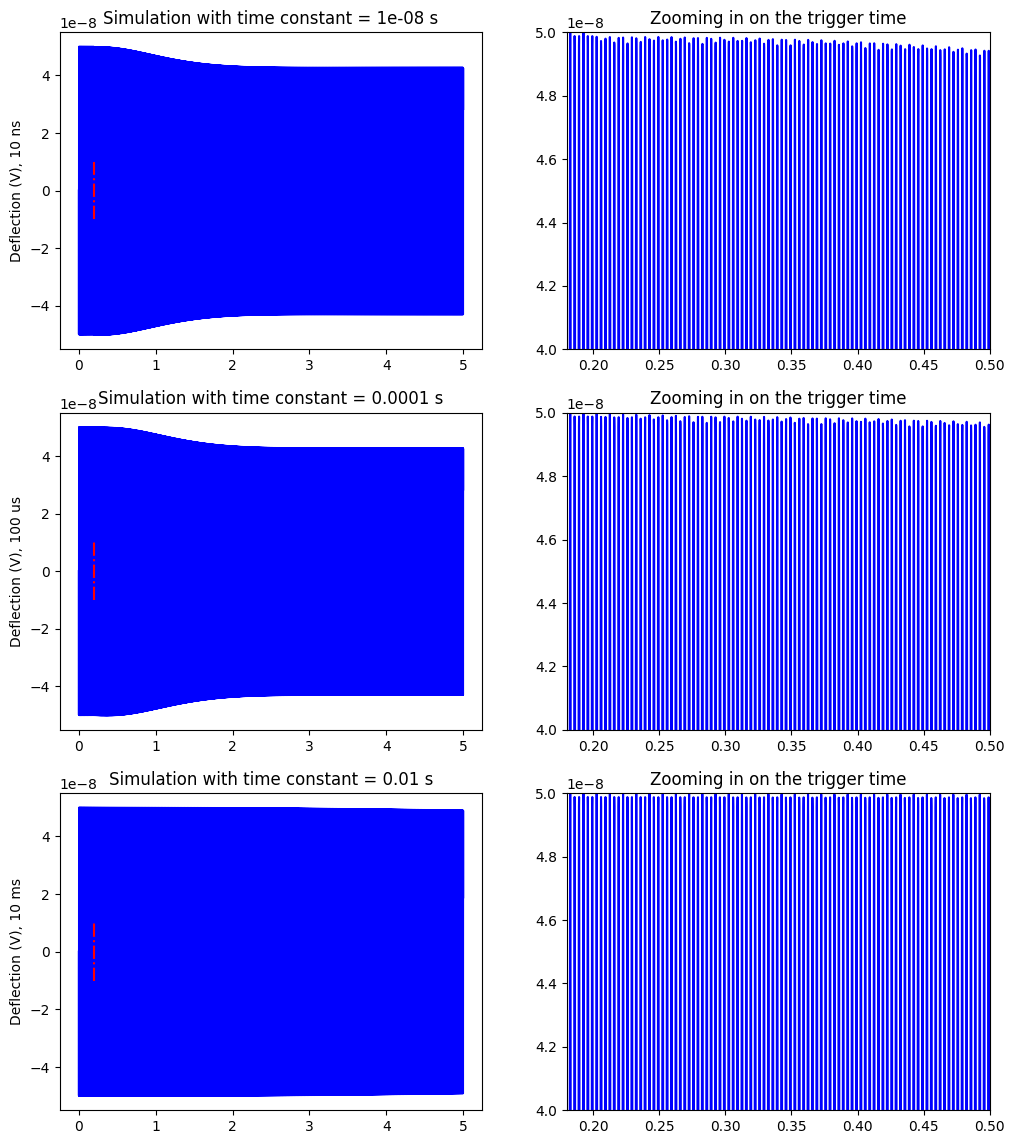

In [64]:
# tau만 변경하며 그래프 그리기
fig, a = plt.subplots(nrows=3, ncols = 2, figsize=(12,14))

cantil.tau = 1e-8
cantil.func_args = [cantil.tau]
Z, info = cantil.simulate()
a[0][0].plot(cantil.t_Z * 1e3, Z, 'b')
a[0][1].plot(cantil.t_Z * 1e3, Z, 'b')
a[0][0].set_ylabel('Deflection (V), 10 ns')
a[0][0].set_title('Simulation with time constant = ' + str(cantil.tau) + ' s')
a[0][1].set_title('Zooming in on the trigger time')
a[0][1].set_xlim(0.18, 0.5)
a[0][1].set_ylim(4e-8, 5e-8)

cantil.tau = 1e-4
cantil.func_args = [cantil.tau]
Z, info = cantil.simulate()
a[1][0].plot(cantil.t_Z * 1e3, Z, 'b')
a[1][1].plot(cantil.t_Z * 1e3, Z, 'b')
a[1][0].set_ylabel('Deflection (V), 100 us')
a[1][0].set_title('Simulation with time constant = ' + str(cantil.tau) + ' s')
a[1][1].set_title('Zooming in on the trigger time')
a[1][1].set_xlim(0.18, 0.5)
a[1][1].set_ylim(4e-8, 5e-8)

cantil.tau = 1e-2
cantil.func_args = [cantil.tau]
Z, info = cantil.simulate()
a[2][0].plot(cantil.t_Z * 1e3, Z, 'b')
a[2][1].plot(cantil.t_Z * 1e3, Z, 'b')
a[2][0].set_ylabel('Deflection (V), 10 ms')
a[2][0].set_title('Simulation with time constant = ' + str(cantil.tau) + ' s')
a[2][1].set_title('Zooming in on the trigger time')
a[2][1].set_xlim(0.18, 0.5)
a[2][1].set_ylim(4e-8, 5e-8)

trigger_line = np.linspace(-1e-8, 1e-8, 10)
a[0][0].plot(np.ones(len(trigger_line))*cantil.trigger * 1e3, trigger_line, 'r-.')
a[1][0].plot(np.ones(len(trigger_line))*cantil.trigger * 1e3, trigger_line, 'r-.')
a[2][0].plot(np.ones(len(trigger_line))*cantil.trigger * 1e3, trigger_line, 'r-.')

In [65]:
cantil.res_freq

300000.0

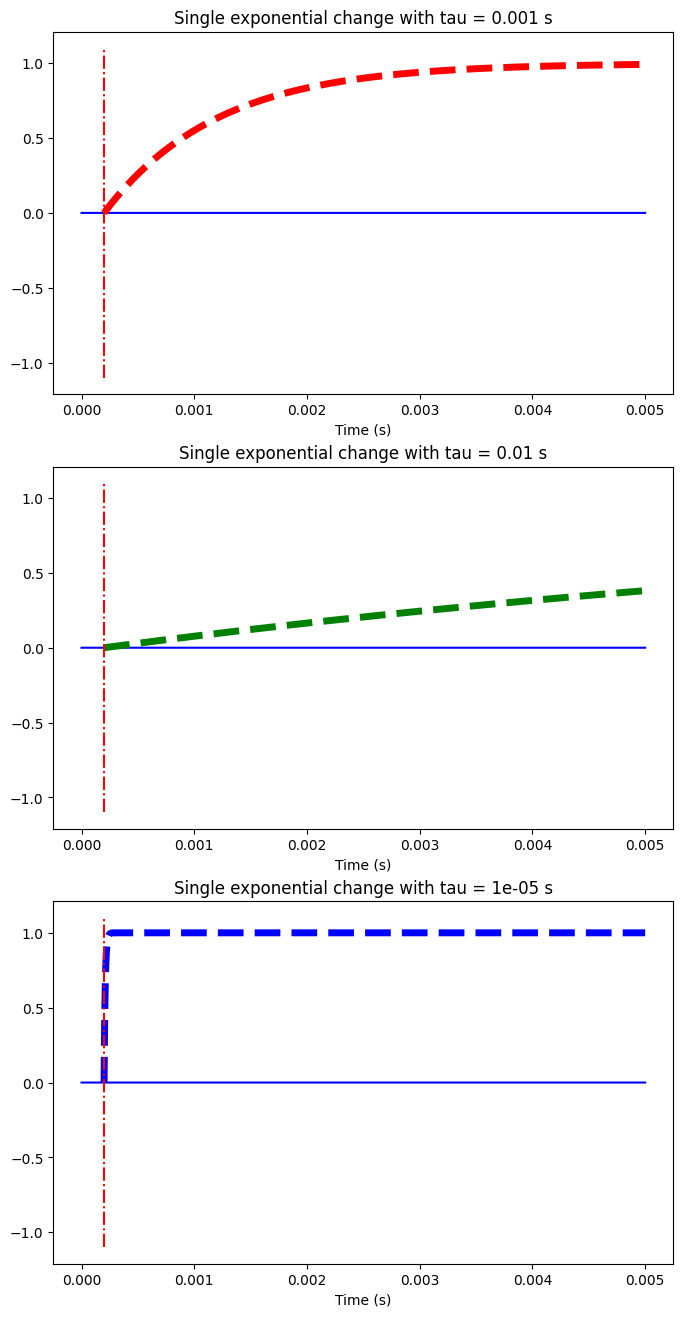

In [78]:
# trigger :0.002 , total time : 0.005 , period : 1e-7
time_axis = np.arange(cantil.trigger, cantil.total_time, 1/cantil.sampling_rate)
tau = 1e-3
cantil.func_args=[tau]
exc_func = excitation.single_exp(time_axis-cantil.trigger,tau)

fig,ax = plt.subplots(nrows=3,figsize=(8,16))

Z,_ = cantil.simulate()
# Red
ax[0].plot(cantil.t_Z, Z, 'b')
ax[0].plot(time_axis, exc_func, 'r--', linewidth=5)
ax[0].set_title('Single exponential change with tau = ' + str(tau) + ' s')
ax[0].set_xlabel('Time (s)')

# Green
tau = 1e-2
cantil.func_args = [tau]
exc_function = excitation.single_exp(time_axis - cantil.trigger, tau)
ax[1].plot(cantil.t_Z, Z, 'b')
ax[1].plot(time_axis, exc_function, 'g--', linewidth=5)
ax[1].set_title('Single exponential change with tau = ' + str(tau) + ' s')
ax[1].set_xlabel('Time (s)')

# Blue
tau=1e-5
cantil.func_args = [tau]
exc_function = excitation.single_exp(time_axis - cantil.trigger, tau)
Z, _ = cantil.simulate()
ax[2].plot(cantil.t_Z, Z, 'b')
ax[2].plot(time_axis, exc_function, 'b--', linewidth=5)
ax[2].set_title('Single exponential change with tau = ' + str(tau) + ' s')
ax[2].set_xlabel('Time (s)')

trigger_line = np.linspace(-1.1, 1.1, 10)
ax[0].plot(np.ones(len(trigger_line))*cantil.trigger, trigger_line, 'r-.')
ax[1].plot(np.ones(len(trigger_line))*cantil.trigger, trigger_line, 'r-.')
ax[2].plot(np.ones(len(trigger_line))*cantil.trigger, trigger_line, 'r-.')

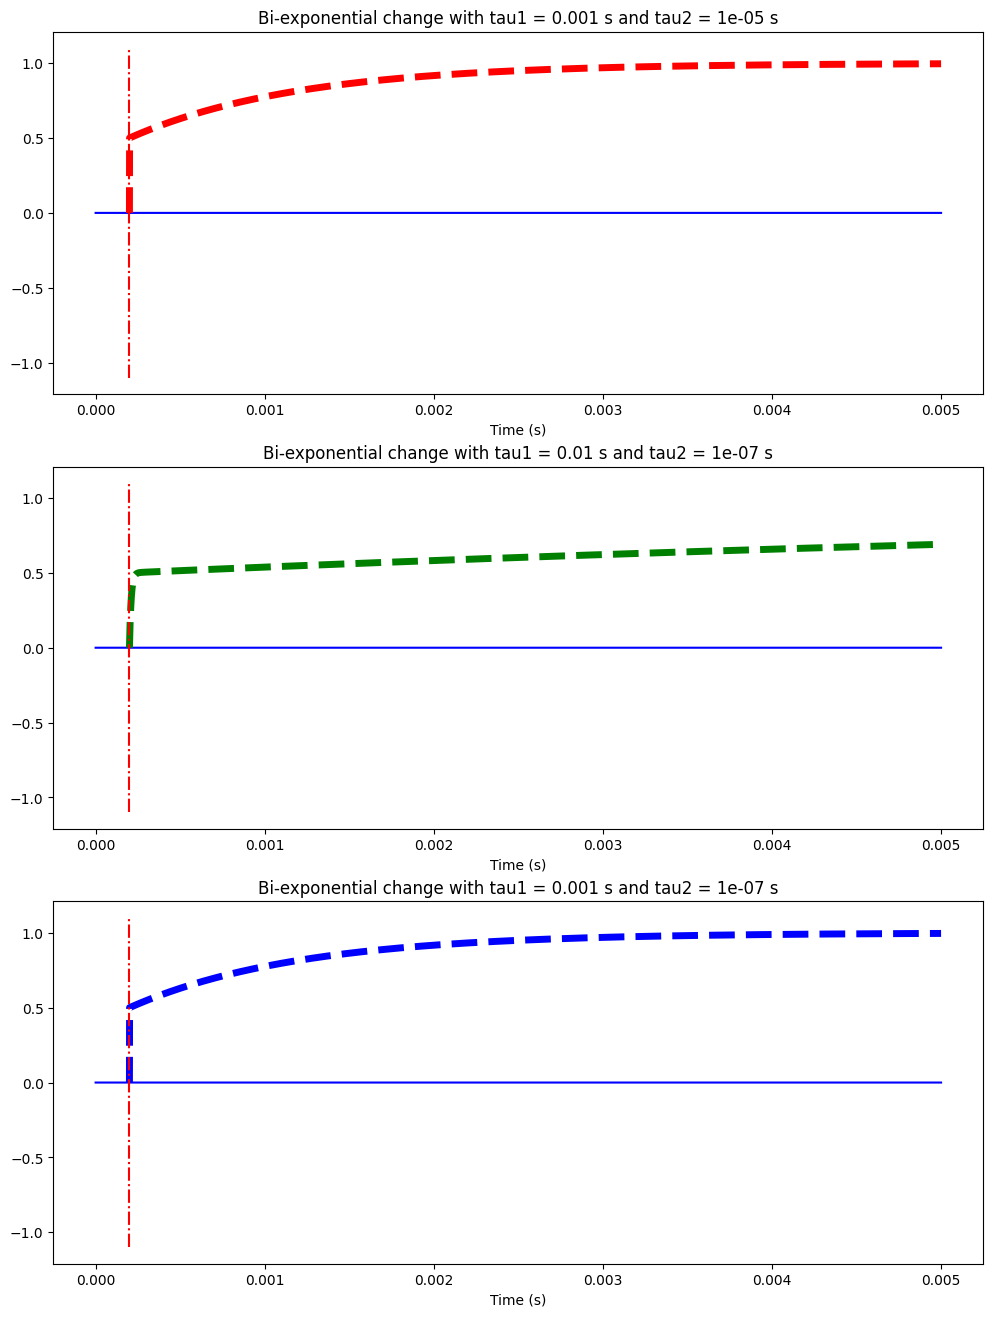

In [82]:
# Bi-exponential
cantil = MechanicalDrive(cantil_params,force_params,simul_params,
                         func = excitation.bi_exp , func_args = [1e-3,1e-5])
exp_func = excitation.bi_exp(time_axis-cantil.trigger,*cantil.func_args)
fig,ax = plt.subplots(nrows=3,figsize=(12,16))

Z,_ = cantil.simulate()
ax[0].plot(cantil.t_Z, Z, 'b')
ax[0].plot(time_axis, exc_function, 'r--', linewidth=5)
ax[0].set_title('Bi-exponential change with tau1 = ' + str(cantil.func_args[0]) + ' s and tau2 = ' + str(cantil.func_args[1]) + ' s')
ax[0].set_xlabel('Time (s)')

# tau 변경 , green
cantil.func_args = [1e-2, 1e-5]
exc_function = excitation.bi_exp(time_axis - cantil.trigger, *cantil.func_args)
Z, _ = cantil.simulate()
ax[1].plot(cantil.t_Z, Z, 'b')
ax[1].plot(time_axis, exc_function, 'g--', linewidth=5)
ax[1].set_title('Bi-exponential change with tau1 = ' + str(cantil.func_args[0]) + ' s and tau2 = ' + str(cant.func_args[1]) + ' s')
ax[1].set_xlabel('Time (s)')

# tau 변경, blue
cantil.func_args = [1e-3, 1e-7]
exc_function = excitation.bi_exp(time_axis - cantil.trigger, *cantil.func_args)

Z, _ = cantil.simulate()
ax[2].plot(cantil.t_Z, Z, 'b')
ax[2].plot(time_axis, exc_function, 'b--', linewidth=5)
ax[2].set_title('Bi-exponential change with tau1 = ' + str(cantil.func_args[0]) + ' s and tau2 = ' + str(cant.func_args[1]) + ' s')
ax[2].set_xlabel('Time (s)')

trigger_line = np.linspace(-1.1, 1.1, 10)
ax[0].plot(np.ones(len(trigger_line))*cantil.trigger, trigger_line, 'r-.')
ax[1].plot(np.ones(len(trigger_line))*cantil.trigger, trigger_line, 'r-.')
ax[2].plot(np.ones(len(trigger_line))*cantil.trigger, trigger_line, 'r-.')

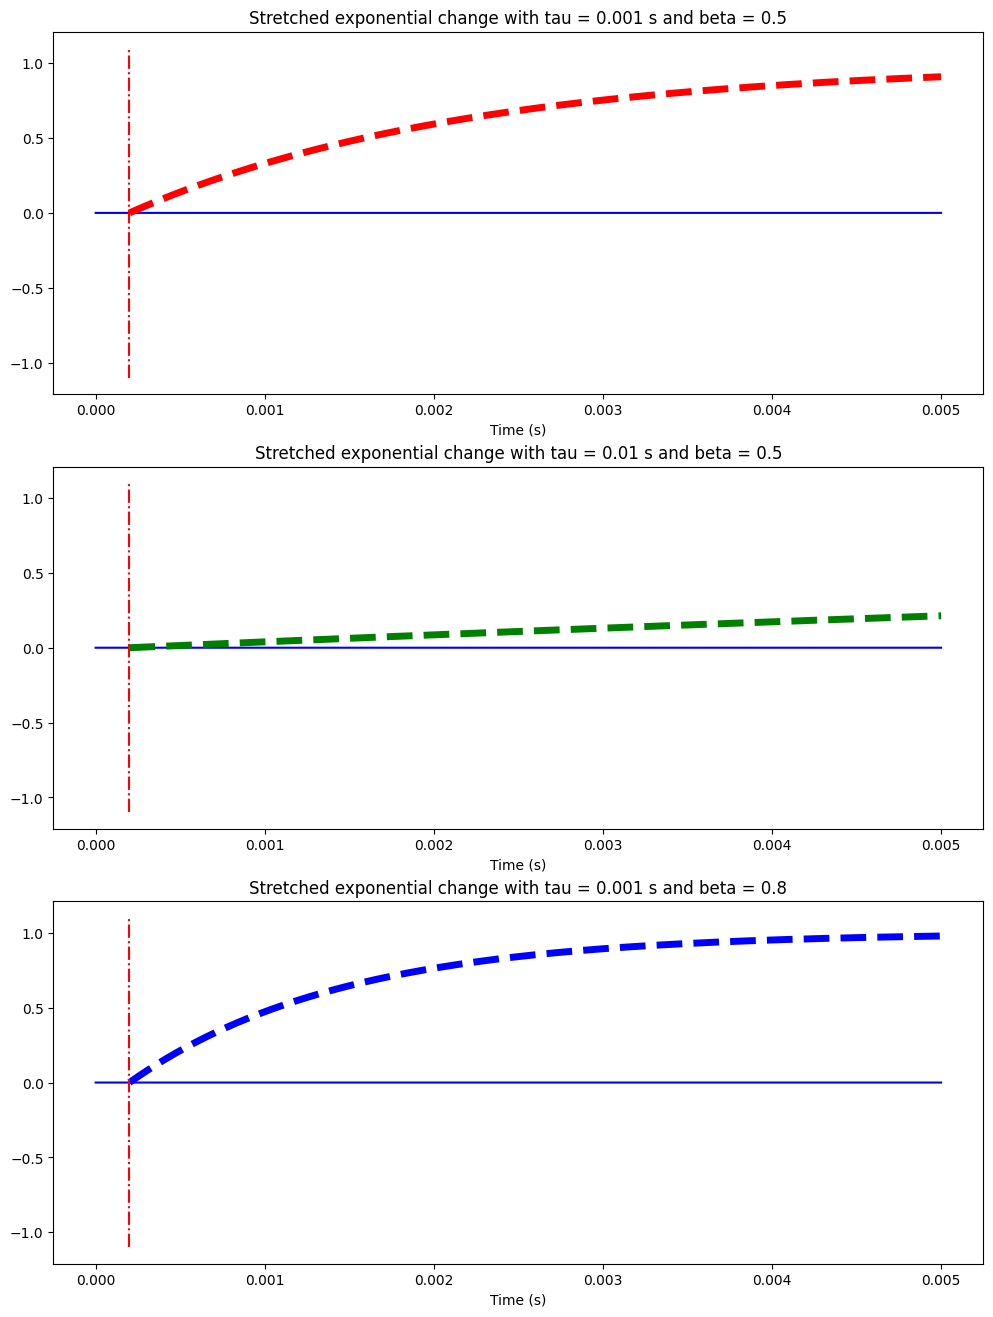

In [85]:
# Stretched exponential
# func_args = [tau, betta]
cant = MechanicalDrive(cantil_params, force_params, simul_params, func=excitation.str_exp, func_args=[1e-3, 0.5])

time_axis = np.arange(cant.trigger, cant.total_time, 1/cant.sampling_rate)
exc_function = excitation.str_exp(time_axis - cant.trigger, *cant.func_args)

fig, ax = plt.subplots(nrows=3, figsize=(12,16))

# Red
Z, _ = cant.simulate()
ax[0].plot(cant.t_Z, Z, 'b')
ax[0].plot(time_axis, exc_function, 'r--', linewidth=5)
ax[0].set_title('Stretched exponential change with tau = ' + str(cant.func_args[0]) + ' s and beta = ' + str(cant.func_args[1]))
ax[0].set_xlabel('Time (s)')

# tau변경, betta 그대로 / green
cant.func_args = [1e-2, 0.5]
exc_function = excitation.str_exp(time_axis - cant.trigger, *cant.func_args)
Z, _ = cant.simulate()
ax[1].plot(cant.t_Z, Z, 'b')
ax[1].plot(time_axis, exc_function, 'g--', linewidth=5)
ax[1].set_title('Stretched exponential change with tau = ' + str(cant.func_args[0]) + ' s and beta = ' + str(cant.func_args[1]))
ax[1].set_xlabel('Time (s)')

# 1번의 tau로 다시, betta 변경 / blue
cant.func_args = [1e-3, 0.8]
exc_function = excitation.str_exp(time_axis - cant.trigger, *cant.func_args)
Z, _ = cant.simulate()
ax[2].plot(cant.t_Z, Z, 'b')
ax[2].plot(time_axis, exc_function, 'b--', linewidth=5)
ax[2].set_title('Stretched exponential change with tau = ' + str(cant.func_args[0]) + ' s and beta = ' + str(cant.func_args[1]))
ax[2].set_xlabel('Time (s)')

# Add a line to mark the trigger at each point
trigger_line = np.linspace(-1.1, 1.1, 10)
ax[0].plot(np.ones(len(trigger_line))*cant.trigger, trigger_line, 'r-.')
ax[1].plot(np.ones(len(trigger_line))*cant.trigger, trigger_line, 'r-.')
ax[2].plot(np.ones(len(trigger_line))*cant.trigger, trigger_line, 'r-.')

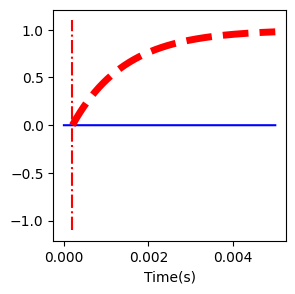

In [98]:
# 임의의 함수 만들기

def new_func(t,tau,tau2,tau3):
    return t*tau + t*tau2**2 - tau3

cantil = MechanicalDrive(cantil_params,force_params,simul_params,func = new_func, func_args = [1e-3, 5e-4, 2e-3] )
time_axis = np.arange(cant.trigger, cant.total_time, 1/cant.sampling_rate)
exc_func = new_func(time_axis-cantil.trigger, *cantil.func_args)

fig,ax = plt.subplots(figsize = (3,3))

Z,_ = cantil.simulate()
ax.plot(cantil.t_Z,Z,'b')
ax.plot(time_axis, exc_function, 'r--', linewidth=5)
ax.set_xlabel('Time(s)')

trigger_line = np.linspace(-1.1, 1.1, 10)
ax.plot(np.ones(len(trigger_line))*cant.trigger, trigger_line, 'r-.')
